# **Milestones 1** 
*Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 1 dalam konsep Supervised Learning.*


### **i. PERKENALAN**

##### **Nama :Dennis Herdiawan**
##### **Batch : 004**
#### **Background : Manajemen**

---
## Tentang kumpulan data ini

Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ('ya') atau tidak ('tidak') berlangganan.

### Attribute Information:

Input variables:

**bank client data:**
1. age (numeric)
2. job : jenis pekerjaan (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : status pernikahan (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: memiliki kredit di default? (categorical: 'no','yes','unknown')
6. housing: memiliki pinjaman perumahan? (categorical: 'no','yes','unknown')
7. loan: memiliki pinjaman pribadi? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**

8. contact: jenis komunikasi kontak (categorical: 'cellular','telephone')
9. month: kontak terakhir bulan tahun (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: hari kontak terakhir dalam seminggu (categorical: 'mon','tue','wed','thu','fri')
11. duration:durasi kontak terakhir, dalam detik (numeric). Catatan penting: atribut ini sangat mempengaruhi target keluaran (e.g., if duration=0 then y='no'). 

**other attributes:**

12. campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numeric, includes last contact)
13. pdays: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numeric; 999 means client was not previously contacted)
14. previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numeric)
15. poutcome: hasil dari kampanye pemasaran sebelumnya(categorical: 'failure','nonexistent','success')

**social and economic context attributes:**

16. emp.var.rate: tingkat variasi pekerjaan- quarterly indicator (numeric)
17. cons.price.idx: Indeks Harga Konsumen - monthly indicator (numeric)
18. cons.conf.idx: indeks kepercayaan konsumen - monthly indicator (numeric)
19. euribor3m: tarif euro 3 bulan - daily indicator (numeric)
20. nr.employed: Jumlah Karyawan - quarterly indicator (numeric)

**Output variable (desired target):**

21. y - apakah klien sudah berlangganan deposito berjangka? (binary: 'yes','no')



**We want to create a model for predicting client to subscribe a term deposit.**

## **Objectives**
Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 1 dalam konsep Supervised Learning sebagai berikut:

- Mampu memahami konsep supervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan data yang diberikan
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning



### **ii. DATA LIBRARY**

In [ ]:
# Pandas, Numpy, MatPlotlib, Seaborn, Coubter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin

# Pipeline
from imblearn.pipeline import Pipeline

# Train Test Split & CV
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV 

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### **iii. DATA LOADING**

In [ ]:
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')

### iv Data Cleaning

In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.shape

(41188, 21)

In [ ]:
print(f"Is there any duplicated rows? \n{df.duplicated().any()}")
print(f"\nHow many? \n{df.duplicated().sum()} rows")

Is there any duplicated rows? 
True

How many? 
12 rows


In [ ]:
# Drop the Job Occupations that are "Unknown"
df = df.drop(df.loc[df["job"] == "unknown"].index)
# df = df.drop(df.loc[df["poutcome"] == "unknown"].index)

# Admin and management are basically the same let's put it under the same categorical value
lst = [df]

for col in lst:
    col.loc[col["job"] == "admin.", "job"] = "management"
#     col.loc[col["contact"] == "unknown", "contact"] = "telephone"

In [ ]:
df.shape

(40858, 21)

In [ ]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

### v. Explorasi Data

In [ ]:
#checking unique data from every columns. Just in case there's an unknown input
check = df.columns
for column in check:
    print(f"{[column]} \n {df[column].unique()} \n")

['age'] 
 [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 

['job'] 
 ['housemaid' 'services' 'management' 'blue-collar' 'technician' 'retired'
 'unemployed' 'self-employed' 'entrepreneur' 'student'] 

['marital'] 
 ['married' 'single' 'divorced' 'unknown'] 

['education'] 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

['default'] 
 ['no' 'unknown' 'yes'] 

['housing'] 
 ['no' 'yes' 'unknown'] 

['loan'] 
 ['no' 'yes' 'unknown'] 

['contact'] 
 ['telephone' 'cellular'] 

['month'] 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

['day_of_week'] 
 ['mon' 'tue' 'wed' 'thu' 'fri'] 

['duration'] 
 [ 261  149  226 ... 1246 1556 1868] 

['campaign'] 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 1

In [ ]:
df.shape

(40846, 21)

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,40846.000000,40846.000000,40846.000000,40846.000000,40846.000000,40846.000000,40846.000000,40846.000000,40846.000000,40846.000000
mean,39.979043,258.466410,2.567228,962.656588,0.173163,0.079692,93.574563,-40.516638,3.618646,5166.987228
std,10.402633,259.362922,2.770342,186.462568,0.495103,1.570324,0.578693,4.627616,1.734659,72.231723
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


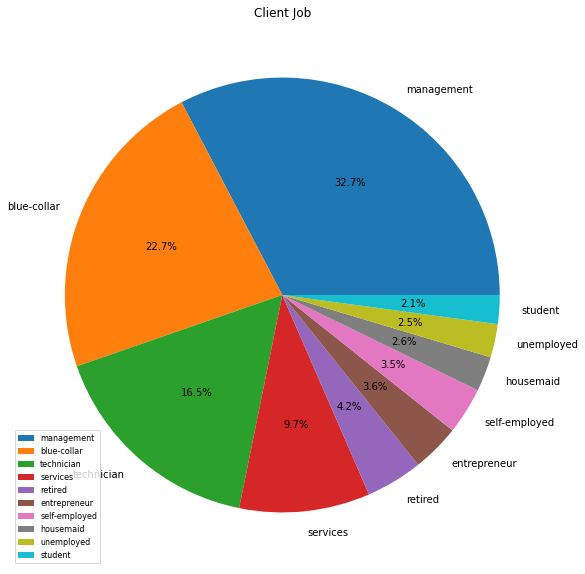

In [ ]:
plt.figure(figsize = (10,10))
plt.pie(df['job'].value_counts(), labels=df['job'].value_counts().index, autopct='%1.1f%%')
plt.title("Client Job")
plt.legend(loc=3,prop={'size': 8})
plt.show()

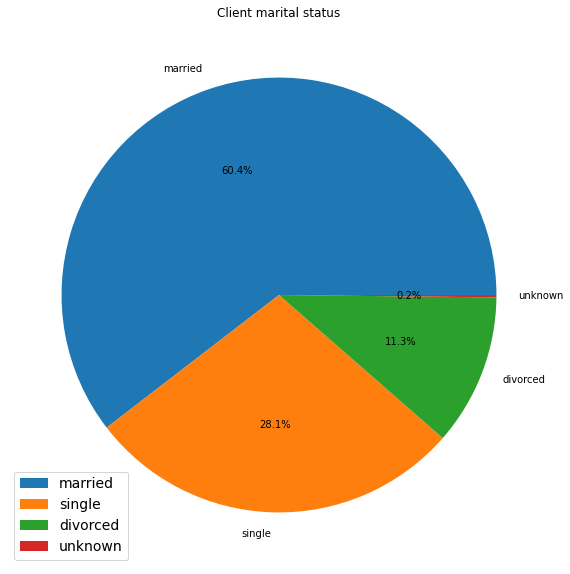

In [ ]:
plt.figure(figsize = (10,10))
plt.pie(
    df['marital'].value_counts(),
    labels=df['marital'].value_counts().index,
    autopct='%1.1f%%'
)
plt.title("Client marital status")
plt.legend(loc=3,prop={'size': 14})
plt.show()

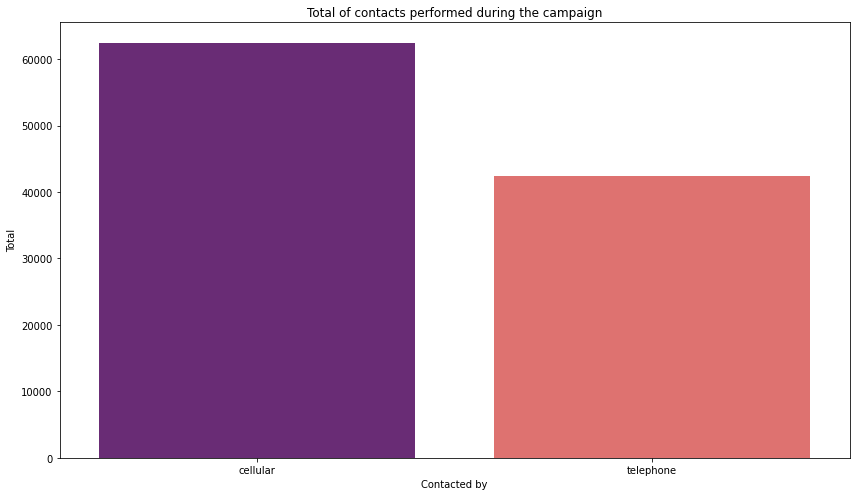

In [ ]:
plt.figure(figsize = (12,7))

sns.barplot(x='contact',
            y='campaign',
            data=df.groupby(df['contact']).sum().campaign.reset_index(),
            palette='magma')

plt.ylabel("Total")
plt.xlabel("Contacted by")
plt.title('Total of contacts performed during the campaign')

plt.tight_layout()
plt.show()

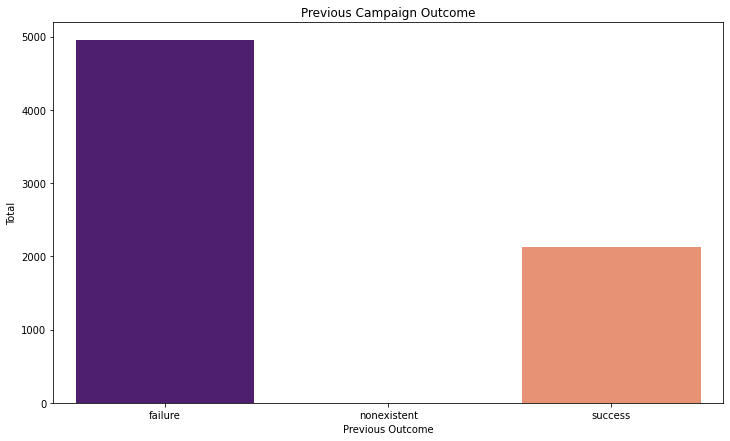

In [ ]:
plt.figure(figsize = (12,7))

sns.barplot(
    x='poutcome', 
    y='previous', 
    data=df.groupby(df['poutcome']).sum().previous.reset_index(), 
    palette='magma')

plt.ylabel("Total")
plt.xlabel("Previous Outcome")
plt.title('Previous Campaign Outcome')

plt.show()

In [ ]:
# for numerical columns or you can use df.describe()
num_column = list(df.select_dtypes("number").columns)
df[num_column].describe().T

,count,mean,std,min,25%,50%,75%,max
age,40846.0,39.979043,10.402633,17.000,32.000,38.000,47.000,98.000
duration,40846.0,258.466410,259.362922,0.000,102.000,180.000,320.000,4918.000
campaign,40846.0,2.567228,2.770342,1.000,1.000,2.000,3.000,56.000
pdays,40846.0,962.656588,186.462568,0.000,999.000,999.000,999.000,999.000
previous,40846.0,0.173163,0.495103,0.000,0.000,0.000,0.000,7.000
emp.var.rate,40846.0,0.079692,1.570324,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,40846.0,93.574563,0.578693,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,40846.0,-40.516638,4.627616,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,40846.0,3.618646,1.734659,0.634,1.344,4.857,4.961,5.045
nr.employed,40846.0,5166.987228,72.231723,4963.600,5099.100,5191.000,5228.100,5228.100


Untungnya, tidak ada <b>nilai yang hilang</b>. Jika ada nilai yang hilang kita harus mengisinya dengan median, mean atau modus. Saya cenderung menggunakan median tetapi dalam skenario ini tidak perlu mengisi nilai yang hilang. Ini pasti akan membuat pekerjaan kita lebih mudah!

In [ ]:
# for categorical value
cat_column = list(df.select_dtypes(object).drop(columns = ["y"]).columns)
df[cat_column].describe().T

,count,unique,top,freq
job,40846,10,management,13343
marital,40846,4,married,24687
education,40846,8,university.degree,12119
default,40846,3,no,32399
housing,40846,3,yes,21399
loan,40846,3,no,33670
contact,40846,2,cellular,25967
month,40846,10,may,13647
day_of_week,40846,5,thu,8547
poutcome,40846,3,nonexistent,35258


##### Numerical Column
Numerical column data distribution.

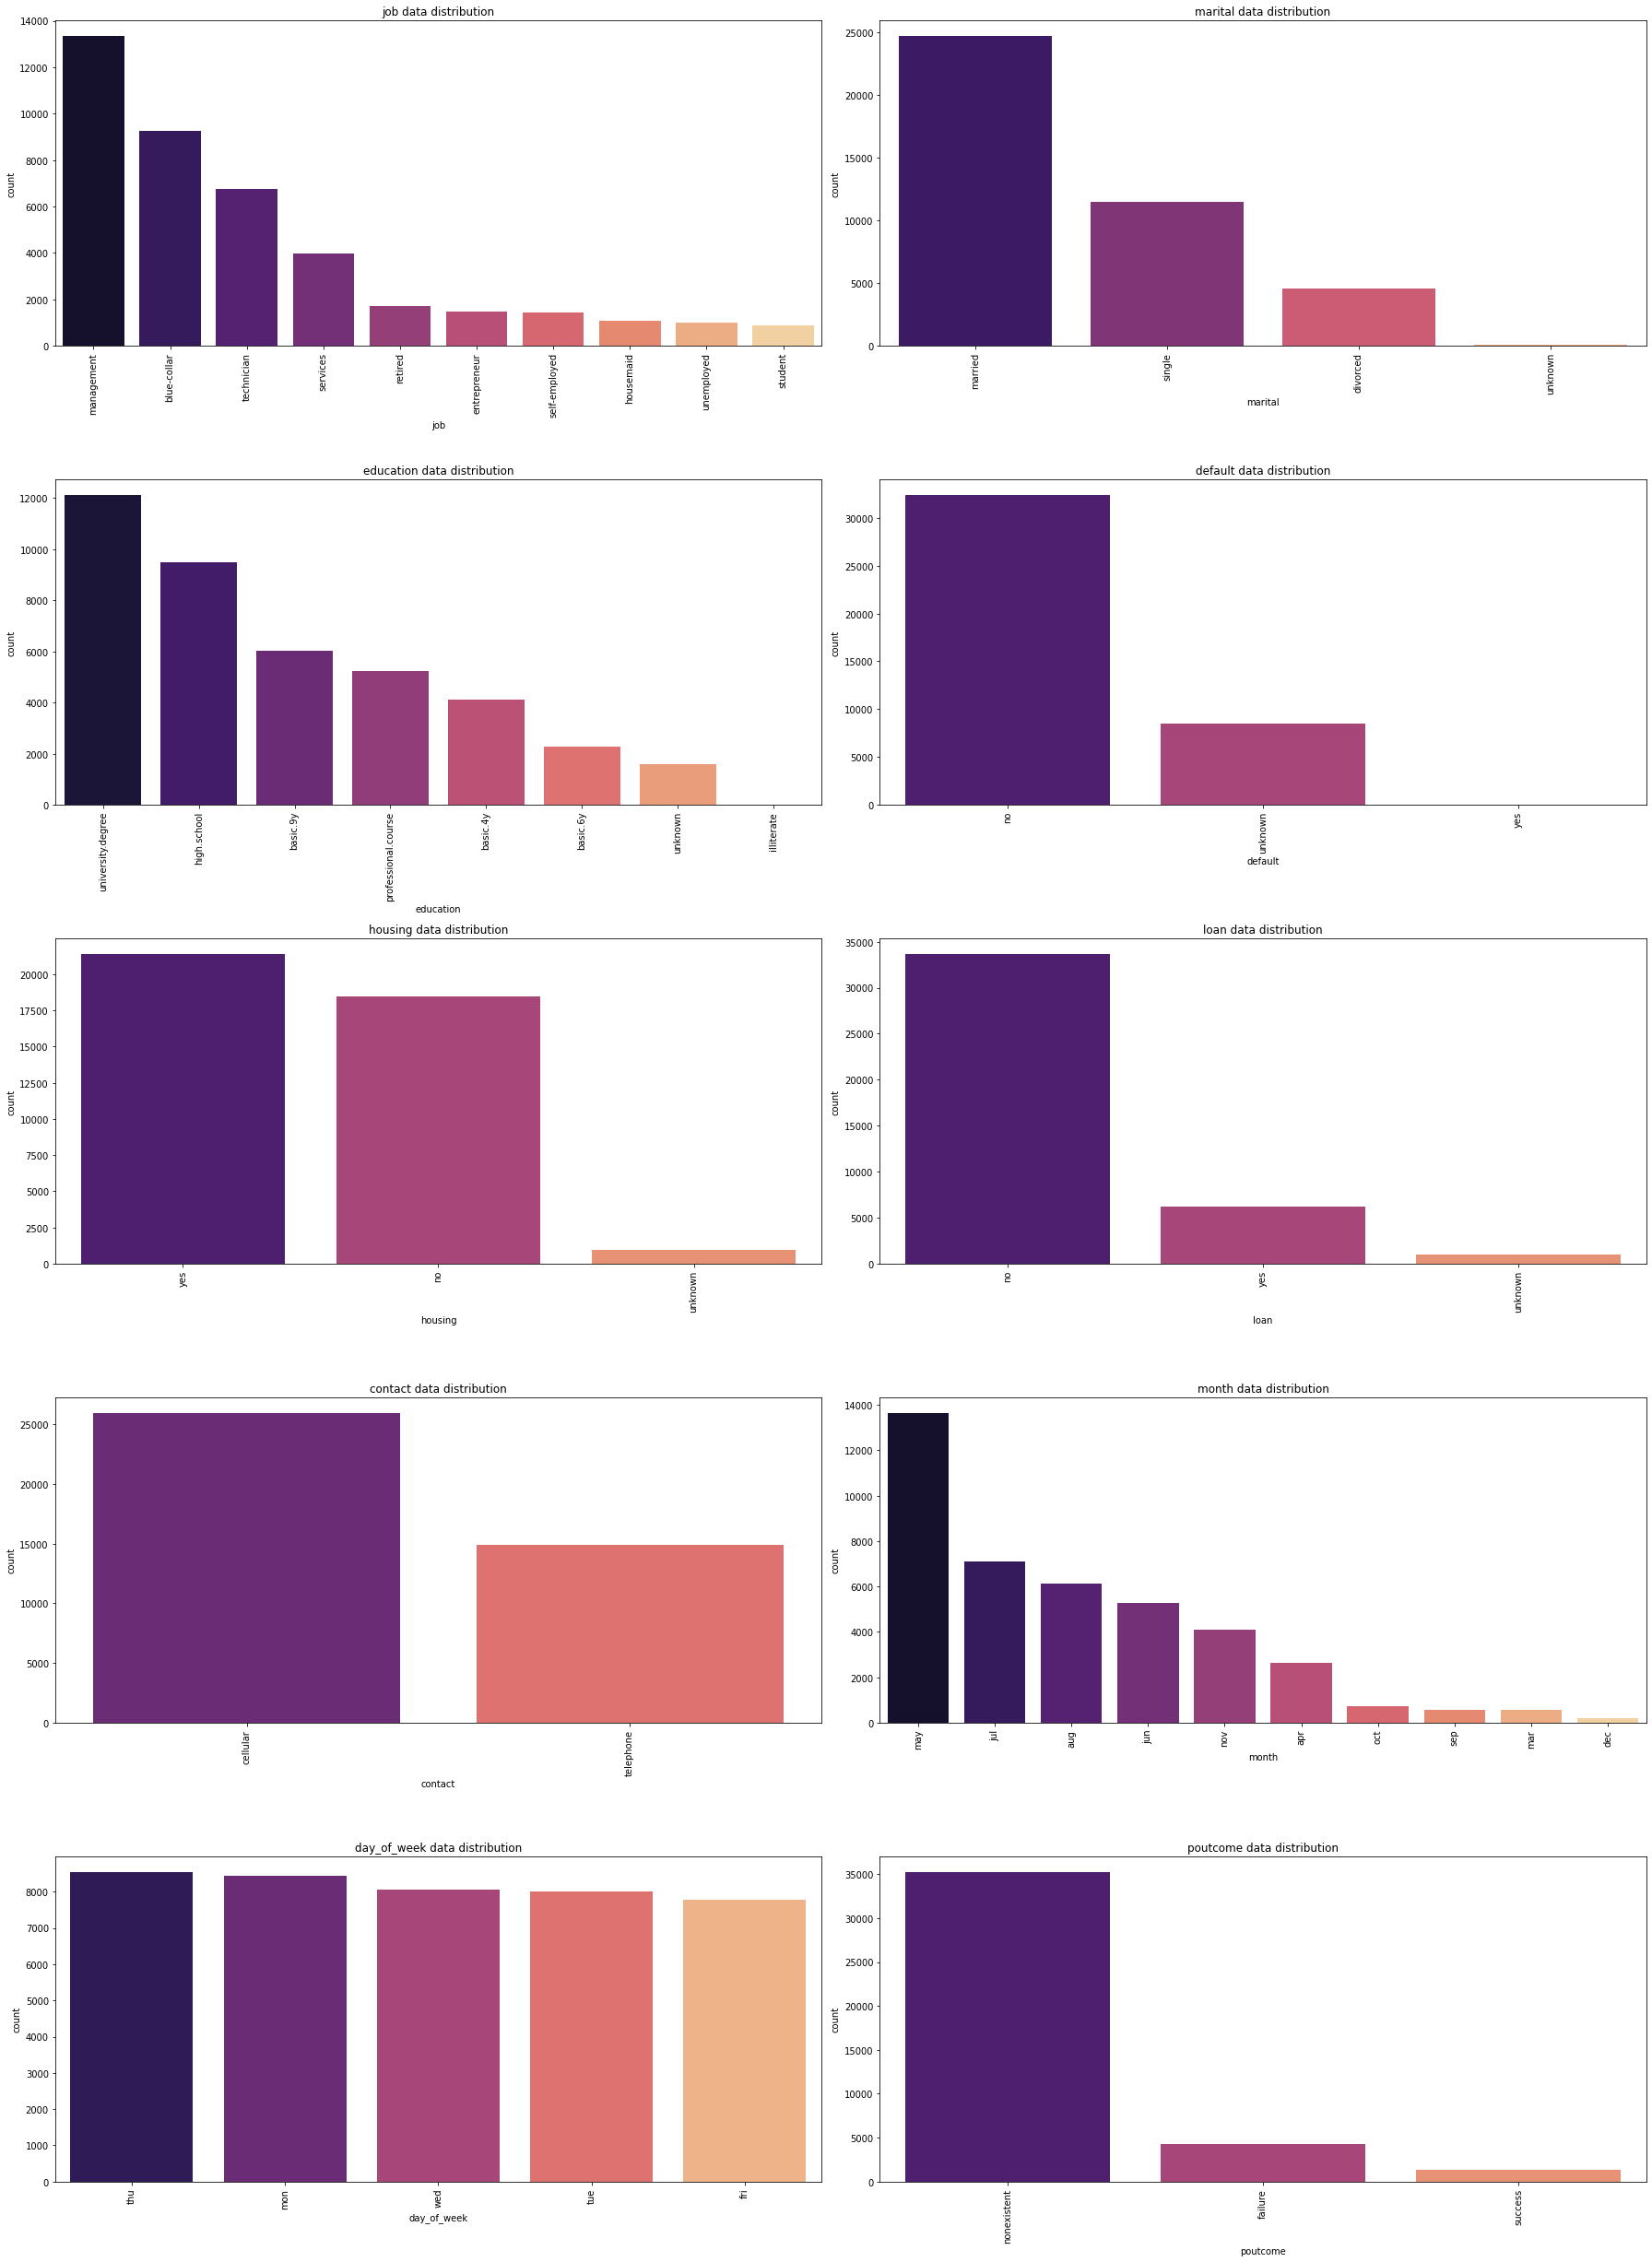

In [ ]:
plt.figure(figsize = (25, 40))
for i in range(len(cat_column)):
    plt.subplot(len(cat_column)//2+1, 2, i + 1)
    sns.countplot(
        x = df[cat_column[i]],
        order = df[cat_column[i]].value_counts().sort_values(ascending = False).index,
        palette = "magma"
    )
    plt.title(str(cat_column[i]) + " data distribution", fontweight = 20)
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### Target distribution data

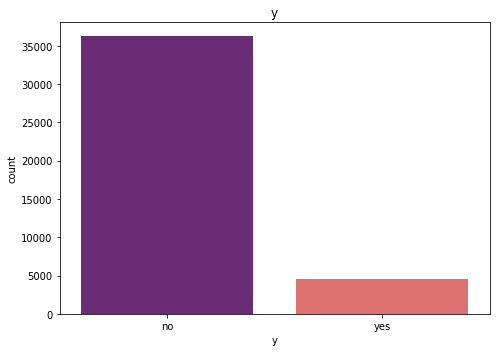

In [ ]:
plt.figure(figsize = (7, 5))
sns.countplot(
    x = df["y"],
    order = df["y"].value_counts().sort_values(ascending = False).index,
    palette = "magma"
)
plt.title("y", fontweight = 20)

plt.tight_layout()
plt.show()

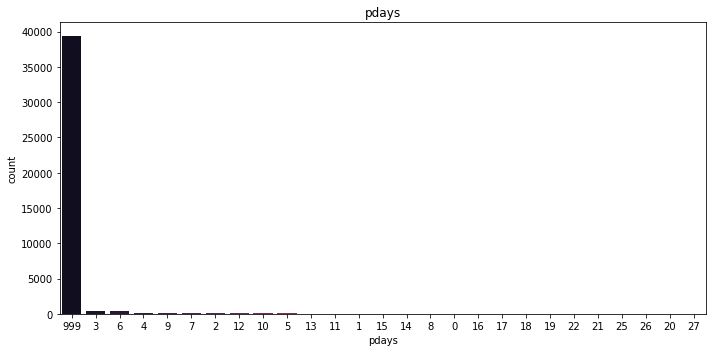

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(
    x = df["pdays"],
    order = df["pdays"].value_counts().sort_values(ascending = False).index,
    palette = "rocket"
)
plt.title("pdays", fontweight = 8)

plt.tight_layout()
plt.show()

In [ ]:
# lets change "999" in pdays with its central tendency(mean or median). To find its central tendency
# we need to drop 999 first than replace it later.

drop_999 = df[df['pdays'] != 999]

# find it's central tendency
drop_999.pdays.describe()

count    1495.000000
mean        6.034783
std         3.834092
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        27.000000
Name: pdays, dtype: float64

In [ ]:
df['pdays'].replace([999],[6], inplace=True)

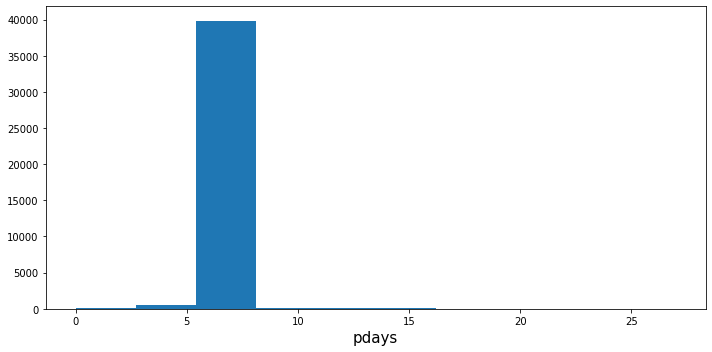

In [ ]:
plt.figure(figsize = (10, 5))

plt.hist(df['pdays'])
plt.xlabel('pdays', fontsize = 15)
    
plt.tight_layout()
plt.show()

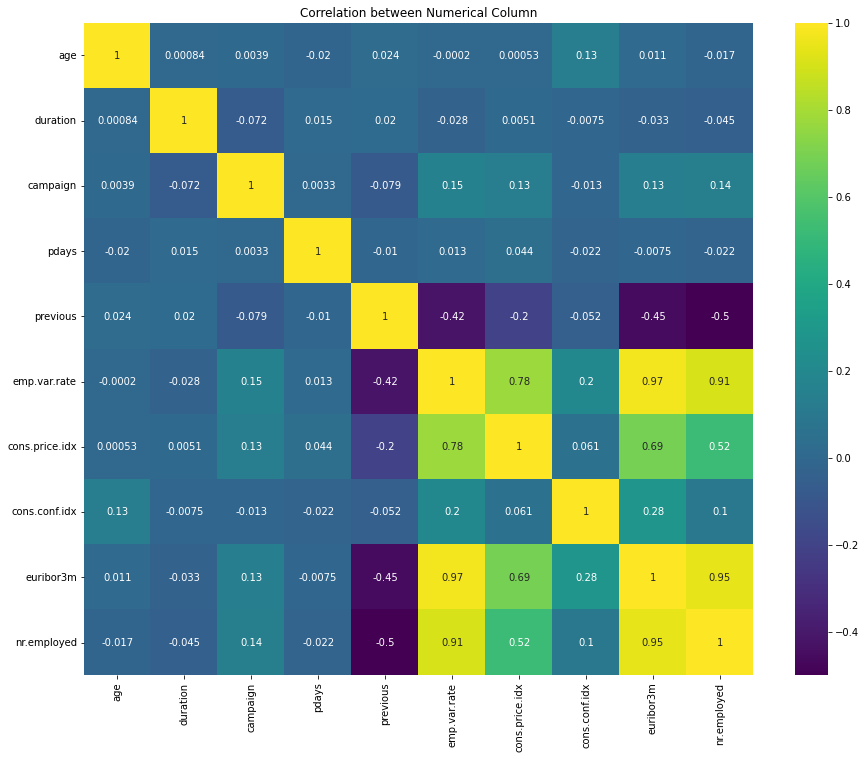

In [ ]:
corr = df[num_column].corr(method = 'pearson')

plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='viridis', annot=True)
            
plt.title("Correlation between Numerical Column")
plt.show()

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,management,married,basic.6y,no,no,no,telephone,may,mon,151,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,6,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,6,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,6,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,6,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
repl = {'no': 0, 'yes': 1}

df['y'].replace(repl, inplace=True)

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,management,married,basic.6y,no,no,no,telephone,may,mon,151,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,6,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,6,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,6,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,6,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
categorical = [col for col in df.columns if df[col].dtypes == 'O']

categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,management,married,basic.6y,no,no,no,telephone,may,mon,151,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,6,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,6,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,6,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,6,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
df.corr()["y"].sort_values(ascending=False)*100

y                 100.000000
duration           40.540138
previous           22.928913
cons.conf.idx       5.483637
age                 3.027556
pdays              -0.843239
campaign           -6.664335
cons.price.idx    -13.609582
emp.var.rate      -29.794585
euribor3m         -30.749782
nr.employed       -35.454300
Name: y, dtype: float64

In [ ]:
df.drop(['nr.employed', 'euribor3m','emp.var.rate'], axis=1, inplace=True)

 ### vi. Preprocessing 

In [ ]:
# their values is too much difference.
df["y"].value_counts()

0    36244
1     4602
Name: y, dtype: int64

#### Data Splitting

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40846 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40846 non-null  int64  
 1   job             40846 non-null  object 
 2   marital         40846 non-null  object 
 3   education       40846 non-null  object 
 4   default         40846 non-null  object 
 5   housing         40846 non-null  object 
 6   loan            40846 non-null  object 
 7   contact         40846 non-null  object 
 8   month           40846 non-null  object 
 9   day_of_week     40846 non-null  object 
 10  duration        40846 non-null  int64  
 11  campaign        40846 non-null  int64  
 12  pdays           40846 non-null  int64  
 13  previous        40846 non-null  int64  
 14  poutcome        40846 non-null  object 
 15  cons.price.idx  40846 non-null  float64
 16  cons.conf.idx   40846 non-null  float64
 17  y               40846 non-null 

In [ ]:
numerical = [col for col in df.columns if df[col].dtypes != 'O']

numerical

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'y']

In [ ]:
categorical = [col for col in df.columns if df[col].dtypes == 'O']

categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [ ]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y,random_state=2021)

In [ ]:
class DenseTransformer(TransformerMixin): 
    def fit(self, X, y=None, **fit_params): 
        return self 
    def transform(self, X, y=None, **fit_params): 
        return X.todense()

### Preprocess
1. Simple Imputer --> Age (median)
1. One Hot --> job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome

In [ ]:
numeric_features = ['age','duration', 'campaign', 'pdays', 'previous']

categorical_features = ['job','marital','education','default','housing',
                                               'loan','contact','month','day_of_week','poutcome']


numeric_transformer = Pipeline([('scaler', StandardScaler())
                               ])

categorical_transformer = Pipeline([('encoder', OneHotEncoder())
                                   ])

preprocessor = ColumnTransformer([
        ('num', numeric_transformer,numeric_features),
        ('cat', categorical_transformer, categorical_features)], remainder = 'passthrough')

### vii. Pendefinisian Model

In [ ]:
logreg = LogisticRegression(random_state=2021)
svm = SVC(C=0.5)
dtc = DecisionTreeClassifier(random_state=2021)
rfc = RandomForestClassifier(random_state=2021)
knn = KNeighborsClassifier()
xgb = XGBClassifier()
nb = GaussianNB()

### xi. Pelatihan Model

In [ ]:
#1. Logistic Regression
pipeline_logreg = Pipeline([
    ('preprocessor',preprocessor),
      ('log_reg',logreg)])
pipeline_logreg.fit(X_train, y_train)
y_pred_logreg = pipeline_logreg.predict(X_test) 
print('Akurasi Model: {:.4f}'.format(accuracy_score(y_test, y_pred_logreg)))

Akurasi Model: 0.9100


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#2. SVC
pipeline_svm = Pipeline([
    ('preprocessor',preprocessor),
      ('svm',svm)])
pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test) 
print('Akurasi Model: {:.4f}'.format(accuracy_score(y_test, y_pred_svm)))

Akurasi Model: 0.8874


In [ ]:
#3. DecisionTreeClassifier
pipeline_dtc = Pipeline([
    ('preprocessor',preprocessor),
      ('dtc',dtc)])
pipeline_dtc.fit(X_train, y_train)
y_pred_dtc = pipeline_dtc.predict(X_test) 
print('Akurasi Model: {:.4f}'.format(accuracy_score(y_test, y_pred_dtc)))

Akurasi Model: 0.8880


In [ ]:
#4. RandomForestClassifier
pipeline_rfc = Pipeline([
    ('preprocessor',preprocessor),
      ('rfc',rfc)])
pipeline_rfc.fit(X_train, y_train)
y_pred_rfc = pipeline_rfc.predict(X_test) 
print('Akurasi Model: {:.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

Akurasi Model: 0.9153


In [ ]:
#5. KNeighborsClassifier
pipeline_knn = Pipeline([
    ('preprocessor',preprocessor),
      ('knn',knn)])
pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test) 
print('Akurasi Model: {:.4f}'.format(accuracy_score(y_test, y_pred_knn)))

Akurasi Model: 0.9018


In [ ]:
#6. XGBClassifier
pipeline_xgb = Pipeline([
    ('preprocessor',preprocessor),
      ('xgb',xgb)])
pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test) 
print('Akurasi Model: {:.4f}'.format(accuracy_score(y_test, y_pred_xgb)))

Akurasi Model: 0.9169


In [ ]:
#7. Gauss Naive Bayes
pipeline_nb = Pipeline([
    ('preprocessor',preprocessor),
    ('to_dense', DenseTransformer()),
      ('nb',nb)])
pipeline_nb.fit(X_train, y_train)
y_pred_nb = pipeline_nb.predict(X_test) 
print('Akurasi Model: {:.4f}'.format(accuracy_score(y_test, y_pred_nb)))

Akurasi Model: 0.8475


## Cross Validation 3 best Model

In [ ]:
#1.RandomForestClassifier
accuracy_forest = cross_val_score(pipeline_rfc, X_train, y_train, cv=10, scoring='accuracy')
print('Cross Validation Score: ', accuracy_forest)

#get the mean of each fold 
print("Average Cross Validation score:", accuracy_forest.mean() * 100)

Cross Validation Score:  [0.90208078 0.91799266 0.91401469 0.90728274 0.91126071 0.9130967
 0.90909091 0.90572391 0.91337619 0.90082645]
Average Cross Validation score: 90.94745721373073


In [ ]:
#2. Logistic Regression
accuracy_logreg = cross_val_score(pipeline_logreg, X_train, y_train, cv=10, scoring='accuracy')
print('Cross Validation Score: ', accuracy_logreg)

#get the mean of each fold 
print("Average Cross Validation score:", accuracy_logreg.mean() * 100)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross Validation Score:  [0.90361077 0.90667075 0.90575275 0.90728274 0.91003672 0.90575275
 0.90756045 0.90511172 0.90603    0.9023569 ]
Average Cross Validation score: 90.60165562752633


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#3. XGBClassifier
accuracy_xgb = cross_val_score(pipeline_xgb, X_train, y_train, cv=10, scoring='accuracy')
print('Cross Validation Score: ', accuracy_xgb)

#get the mean of each fold 
print("Average Cross Validation score:", accuracy_xgb.mean() * 100)

Cross Validation Score:  [0.90330477 0.91401469 0.91340269 0.9130967  0.91493268 0.91921665
 0.91551882 0.91490664 0.91521273 0.90878482]
Average Cross Validation score: 91.3239119431397


## Try to Tuning Random forest & XgbostClassfier

In [ ]:
#1. Randomforest
params = {'rfc__n_estimators' : [ 150, 200], 
          'rfc__max_leaf_nodes': [4,8,16,32],
          'rfc__max_depth': [4,8,16,32]
          }
          
forest_cv = GridSearchCV(pipeline_rfc, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
forest_cv.fit(X_train, y_train)
print(forest_cv.best_params_)
forest_tuned = forest_cv.best_estimator_.fit(X_train, y_train)
y_pred_forest_tuned = forest_tuned.predict(X_test)
print('Akurasi Model Tuned: {:.4f}'.format(accuracy_score(y_test, y_pred_forest_tuned)))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  5.6min finished


{'rfc__max_depth': 32, 'rfc__max_leaf_nodes': 32, 'rfc__n_estimators': 150}
Akurasi Model Tuned: 0.9073


In [ ]:
#2.Xgboost
params = {'xgb__n_estimators': [100, 150, 200],
              'xgb__max_depth': [3, 4, 5, 6, 7],
              'xgb__colsample_bytree': [0.6, 0.7, 1],
              'xgb__gamma': [0.0, 0.1, 0.2]}

boost_cv = GridSearchCV(pipeline_xgb, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
boost_cv.fit(X_train, y_train)
print(boost_cv.best_params_)
boost_tuned = boost_cv.best_estimator_.fit(X_train, y_train)
y_pred_boost_tuned = boost_tuned.predict(X_test)
print('Akurasi Model Tuned: {:.4f}'.format(accuracy_score(y_test, y_pred_boost_tuned)))

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed: 31.1min finished


{'xgb__colsample_bytree': 0.7, 'xgb__gamma': 0.2, 'xgb__max_depth': 4, 'xgb__n_estimators': 200}
Akurasi Model Tuned: 0.9160


### x. Model Inference

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'y'],
      dtype='object')

In [ ]:
#checking unique data from every columns. Just in case there's an unknown input
check = df.columns
for column in check:
    print(f"{[column]} \n {df[column].unique()} \n")

['age'] 
 [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 

['job'] 
 ['housemaid' 'services' 'management' 'blue-collar' 'technician' 'retired'
 'unemployed' 'self-employed' 'entrepreneur' 'student'] 

['marital'] 
 ['married' 'single' 'divorced' 'unknown'] 

['education'] 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

['default'] 
 ['no' 'unknown' 'yes'] 

['housing'] 
 ['no' 'yes' 'unknown'] 

['loan'] 
 ['no' 'yes' 'unknown'] 

['contact'] 
 ['telephone' 'cellular'] 

['month'] 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

['day_of_week'] 
 ['mon' 'tue' 'wed' 'thu' 'fri'] 

['duration'] 
 [ 261  149  226 ... 1246 1556 1868] 

['campaign'] 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 1

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,6,0,nonexistent,93.994,-36.4,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,6,0,nonexistent,93.994,-36.4,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,6,0,nonexistent,93.994,-36.4,0
3,40,management,married,basic.6y,no,no,no,telephone,may,mon,151,1,6,0,nonexistent,93.994,-36.4,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,6,0,nonexistent,93.994,-36.4,0


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y
count,40846.000000,40846.000000,40846.000000,40846.000000,40846.000000,40846.000000,40846.000000,40846.000000
mean,39.979043,258.466410,2.567228,6.001273,0.173163,93.574563,-40.516638,0.112667
std,10.402633,259.362922,2.770342,0.733307,0.495103,0.578693,4.627616,0.316189
min,17.000000,0.000000,1.000000,0.000000,0.000000,92.201000,-50.800000,0.000000
25%,32.000000,102.000000,1.000000,6.000000,0.000000,93.075000,-42.700000,0.000000
50%,38.000000,180.000000,2.000000,6.000000,0.000000,93.749000,-41.800000,0.000000
75%,47.000000,320.000000,3.000000,6.000000,0.000000,93.994000,-36.400000,0.000000
max,98.000000,4918.000000,56.000000,27.000000,7.000000,94.767000,-26.900000,1.000000


In [ ]:
# Pembuatan data inference
databaru = [{'age':35,
             'job':'management',
             'marital':'single',
             'education':'university.degree',
             'default':'yes', 
             'housing':'yes', 
             'loan':'no',
             'contact':'cellular',
              'month':'nov',
              'day_of_week':'wed',
            'duration':3000,
            'campaign':30, 
            'pdays':5,
            'previous':3,
            'poutcome':'success',
            'cons.price.idx':93.798,
            'cons.conf.idx':-32}
             ]

percobaan_1 =pd.DataFrame(databaru,index=[1])
percobaan_1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx
1,35,management,single,university.degree,yes,yes,no,cellular,nov,wed,3000,30,5,3,success,93.798,-32


In [ ]:
pred = boost_tuned.predict(percobaan_1)

In [ ]:
if pred==1:
    print('Customer Berlangganan Term Deposit')
else:
    print('Customer tidak Berlangganan Term Deposit')

Customer Berlangganan Term Deposit


### ix. Pengambilan Kesimpulan

Saya mengambil 7 base model sebagai permodelan kali ini dengan menggunakan matrix skore akurasi yang dimna Merupakan rasio prediksi Benar (positif dan negatif) dengan keseluruhan data.

dengan penilaian 7 base model benchmark lalu saya ambil 3 terbaik dan mecari nilai cross validation.

dan hasil nya sebagai berikut :

7 base model 
1. Logistic regresion :  0.9100
2. SVC : Akurasi Model: 0.8874 
3. Decision Tree Classifier : Akurasi Model: 0.8880
4. Random Forest Classifier : Akurasi Model: 0.9153
5. KNeighborsClassifier : Akurasi Model: 0.9018
6. XGBClassifier : Akurasi Model: 0.9169
7. Gauss Naive Bayes : Akurasi Model: 0.8475

lalu saya memili 3 terbaik untuk di cari nilai cross validation :
1. Logistic regresion : 90.60165562752633
2. Random Forest Classifier : 90.94745721373073
3. XGBClassifier : 91.3239119431397

setelah itu mencari 2 terbaik dan di di coba untuh hyperparameter tuning :
hasil nya adalah 
1. Random Forest Classifier : 0.9073
2. XGBClassifier : 0.9160

Model terbaik yang saya pilih di lihat dari nilai akurasi adalah
2. XGBClassifier dengan nilai akurasi setelah di tuned 0.9160

